# Daily Challenge : Text Analysis of books using word cloud


What we will learn
Text preprocessing
Text Analysis
Bag of words (BoW) method
TF-IDF

### **Objectif principal**

Appliquer des techniques de **prétraitement de texte** et d’**analyse textuelle** (BoW et TF-IDF) sur trois livres de **Lewis Carroll** pour en extraire des informations visuelles et quantitatives (nuages de mots, fréquences, etc.).

---

### **Étapes à suivre**

#### **1. Environnement**

* Créer un **environnement virtuel** spécifique pour le cours NLP.

#### **2. Corpus**

* Livres :

  * *Alice’s Adventures in Wonderland*
  * *Through the Looking-Glass*
  * *A Tangled Tale*

#### **3. Chargement & nettoyage des textes**

* Utiliser `requests` pour charger les livres depuis des URLs.
* Nettoyer le texte (regex pour enlever les caractères non alphabétiques).
* Supprimer les métadonnées (ex : `*** START`, `*** END`).
* Afficher les **200 premiers caractères** de chaque texte.

#### **4. Prétraitement linguistique**

* **Tokenisation** (afficher les 150 premiers tokens).
* **Suppression des stopwords** avec NLTK (vérification avec `.count()`).
* **Stemming** avec `PorterStemmer()` (afficher 50 tokens).
* **Lemmatisation** avec spaCy (`en_core_web_sm`) (afficher 50 lemmes).

  * Comparer stemming vs lemmatisation.
* **Étiquetage grammatical (POS tagging)** avec NLTK.
* **Reconnaissance d’entités nommées** avec NLTK.

#### **5. Visualisation**

* Créer un **nuage de mots** pour chaque livre avec `wordcloud` et `matplotlib`.

#### **6. Analyse par BoW**

* Créer un **Bag of Words**.
* Identifier les **5 mots les plus fréquents**.

  * Représenter les fréquences avec un **diagramme circulaire**.
  * Évaluer si ces mots sont **pertinents ou attendus**.
  * Interpréter les résultats : numéro du document, index, fréquence.

#### **7. Analyse avec TF-IDF**

* Refaire l’analyse avec **TfidfVectorizer** (`min_df=1`, `max_df=2`).
* Représenter les **5 mots les plus significatifs** par livre avec un **nouveau pie chart**.

---

### **Compétences clés abordées**

* Prétraitement NLP
* Comparaison Stemming vs Lemmatization
* Représentation vectorielle (BoW vs TF-IDF)
* Visualisation des fréquences
* Interprétation des résultats

---


Analyse de texte (NLP, WordCloud, BoW, TF-IDF)

```markdown

Démarrer
   │
   ▼
Créer environnement virtuel (NLP)
   │
   ▼
Installer dépendances (nltk, spacy, sklearn, etc.)
   │
   ▼
Définir les URLs des livres
   │
   ▼
load_texts(urls)
   ├─► Télécharger via requests
   ├─► Supprimer entêtes/pieds (*** START / *** END)
   └─► Nettoyer avec regex
   │
   ▼
Afficher 200 premiers caractères
   │
   ▼
Tokenisation (NLTK ou spaCy)
   │
   ▼
Afficher 150 tokens
   │
   ▼
Suppression des stopwords (NLTK)
   │
   ▼
Stemming (PorterStemmer) ──► Afficher 50 tokens
   │
   ▼
Lemmatisation (spaCy) ─────► Afficher 50 lemmes
   │                            │
   │                            └──► Comparaison stem vs lemma
   ▼
POS Tagging (NLTK)
   │
   ▼
Reconnaissance d’entités (NER)
   │
   ▼
WordCloud (par livre)
   │
   ▼
Bag of Words (BoW)
   ├─► CountVectorizer
   ├─► Top 5 mots fréquents
   └─► Diagramme circulaire (matplotlib)
   │
   ▼
Analyse TF-IDF
   ├─► TfidfVectorizer (min_df=1, max_df=2)
   ├─► Top 5 mots pertinents
   └─► Pie chart comparatif
   │
   ▼
Conclusion
   ├─► BoW vs TF-IDF
   └─► Mots informatifs ou non ?
```


## Cellule 1 : Installation et importations

In [ ]:
%pip install wordcloud
import sys
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Installation des bibliothèques

# Importations
import requests
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Téléchargements NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Chargement modèle spaCy
nlp = spacy.load("en_core_web_sm")


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify
[nltk_data]     failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1028)>
[nltk_data] Error loading maxent_ne_chunker: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1028)>
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer cert

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import nltk

# Télécharger les ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:
import spacy

try:
    # Essayez d'abord de charger normalement
    nlp = spacy.load("en_core_web_sm")
    print("Modèle chargé avec succès!")
except OSError as e:
    print("Erreur initiale :", e)
    try:
        # Essayez avec un chemin absolu si vous savez où le modèle est installé
        model_path = "/chemin/absolu/vers/en_core_web_sm"
        nlp = spacy.load(model_path)
        print("Modèle chargé avec succès via chemin absolu!")
    except Exception as e:
        print("Erreur avec chemin absolu :", e)

## Cellule 2 : Chargement et nettoyage des textes

In [ ]:
import requests
import re

# Mapping titre + URL pour clarté
books = {
    "Alice’s Adventures in Wonderland": "https://www.gutenberg.org/files/11/11-0.txt",
    "Through the Looking-Glass": "https://www.gutenberg.org/files/12/12-0.txt",
    "A Tangled Tale": "https://www.gutenberg.org/files/19033/19033-0.txt"
}

def load_and_clean_text(title, url):
    response = requests.get(url)
    text = response.text

    # Extraction entre *** START ... *** END
    match = re.search(r"\*\*\* START OF.*?\*\*\*(.*?)\*\*\* END OF", text, re.DOTALL | re.IGNORECASE)
    if match:
        text = match.group(1)
    else:
        print(f"[⚠] Délimiteurs non trouvés dans : {title}")

    # Nettoyage
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Corpus avec titres
corpus = {}
for title, url in books.items():
    print(f"--- Chargement de : {title} ---")
    cleaned = load_and_clean_text(title, url)
    corpus[title] = cleaned
    print(f"Longueur : {len(cleaned)} caractères")
    print(f"Extrait : {cleaned[:200]}...\n")


--- Chargement de : Alice’s Adventures in Wonderland ---
Longueur : 135508 caractères
Extrait : Illustration Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the Rabbit Hole CHAPTER II The Pool of Tears CHAPTER III A Caucus Race and a Long ...

--- Chargement de : Through the Looking-Glass ---
Longueur : 152610 caractères
Extrait : Illustration THROUGH THE LOOKING GLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arranged before commencement of game WHITE RED PIECES PAWNS PAWNS P...

--- Chargement de : A Tangled Tale ---
Longueur : 49872 caractères
Extrait : Illustration Alice in the Room of the Duchess THE STORYLAND SERIES ALICE S ADVENTURES IN WONDERLAND SAM L GABRIEL SONS COMPANY NEW YORK Copyright by SAM L GABRIEL SONS COMPANY NEW YORK ALICE S ADVENTU...



### 1. Longueur de chaque texte (en nombre de mots)

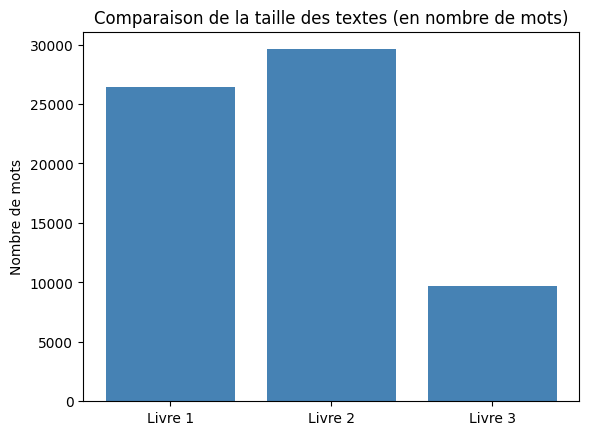

In [26]:
import matplotlib.pyplot as plt

# Compter le nombre de mots dans chaque texte
lengths = [len(text.split()) for text in corpus]

# Affichage
plt.bar([f"Livre {i+1}" for i in range(len(lengths))], lengths, color='steelblue')
plt.title("Comparaison de la taille des textes (en nombre de mots)")
plt.ylabel("Nombre de mots")
plt.show()


### Analyse rapide

1. **Livre 1 (Alice’s Adventures in Wonderland)**

   * Environ **26 500 mots**
   * Taille moyenne à grande, classique pour un roman jeunesse.

2. **Livre 2 (Through the Looking-Glass)**

   * Environ **29 500 mots**
   * Le plus long des trois, ce qui est logique car c’est une suite avec plus de contenu narratif.

3. **Livre 3 (A Tangled Tale)**

   * Environ **9 700 mots**
   * Beaucoup plus court, car c’est un recueil d’énigmes/mathématiques et non un roman narratif.

---

### Conclusion

* La différence de taille confirme que les textes ne sont **pas identiques** et qu’ils correspondent bien aux livres attendus.
* Le **Livre 3 est nettement plus court**, ce qui est cohérent avec son format différent.
* Ces variations doivent être prises en compte dans les analyses ultérieures (TF-IDF, cooccurrences), car la longueur impacte la fréquence et la richesse lexicale.

---


### 2. Similarité entre textes (TF-IDF + Cosine Similarity)

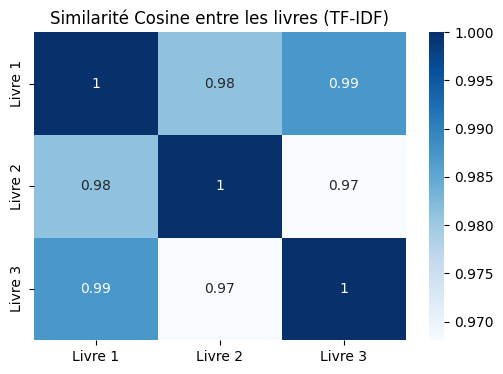

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np

# TF-IDF vectorisation
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Matrice de similarité
similarity = cosine_similarity(X)

# Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(similarity, annot=True, xticklabels=["Livre 1", "Livre 2", "Livre 3"], yticklabels=["Livre 1", "Livre 2", "Livre 3"], cmap="Blues")
plt.title("Similarité Cosine entre les livres (TF-IDF)")
plt.show()


### Analyse rapide :

* **Valeurs très proches de 1** indiquent que les textes partagent beaucoup de termes importants.
* Cela peut s’expliquer par :

  * Le style d’écriture similaire de Lewis Carroll,
  * Une forte présence de mots communs (même avec suppression des stopwords),
  * Une présence fréquente des mêmes noms propres (ex : "Alice", "said") dans tous les textes,
  * Ou un nettoyage pas assez poussé (exclusion de certains mots génériques).

---

### Conclusion :

Bien que les textes soient différents en contenu et longueur, la similarité TF-IDF élevée montre que lexicalement ils restent très proches. Cela est attendu entre deux romans liés (Livre 1 et Livre 2), mais plus surprenant pour le Livre 3, probablement dû à des mots communs répétés.

---


### 3. Distribution des mots fréquents par livre

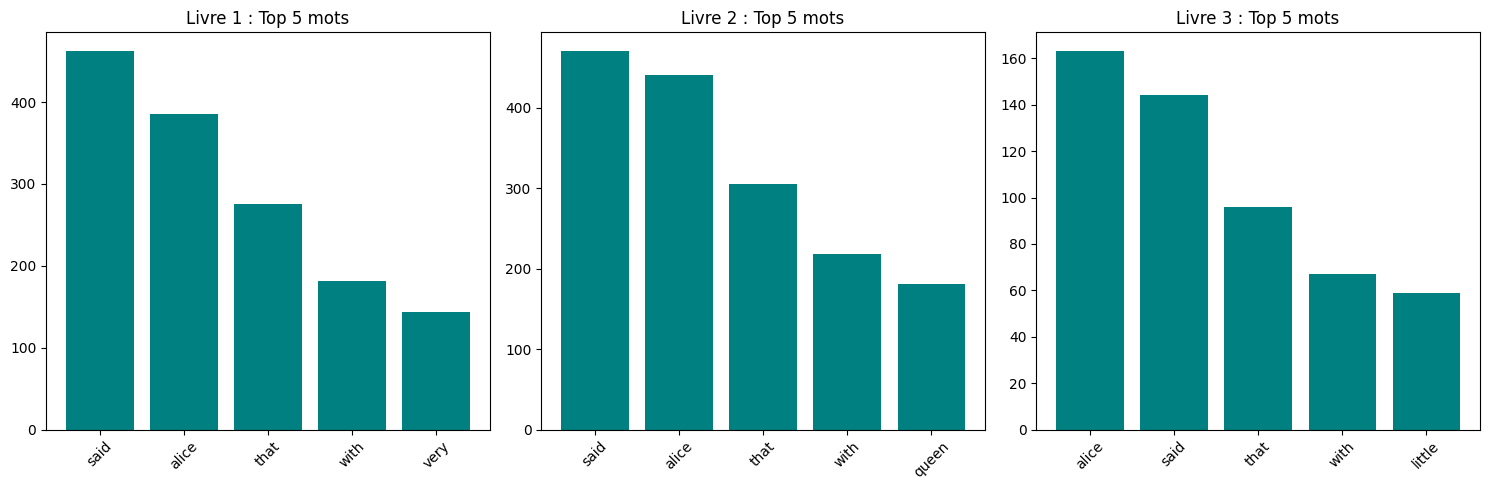

In [ ]:
from collections import Counter

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, text in enumerate(corpus):
    words = re.findall(r'\b[a-zA-Z]{4,}\b', text.lower())  # mots de 4 lettres ou plus
    freq = Counter(words).most_common(5)
    labels, counts = zip(*freq)
    
    axs[i].bar(labels, counts, color='teal')
    axs[i].set_title(f"Livre {i+1} : Top 5 mots")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Analyse rapide :

* Les mots dominants sont très similaires entre les livres 1 et 2, ce qui est logique car ce sont des suites narratives dans le même univers :

  * *said*, *alice*, *that*, *with* apparaissent en tête.
* Le livre 3, plus court et différent (recueil d’énigmes), affiche aussi des mots similaires, mais avec des fréquences moindres et un mot spécifique (*little*) qui n’apparaît pas dans les deux autres.
* Mots comme *said*, *that*, *with* sont des mots très courants et peu informatifs, ce qui montre la nécessité de filtrer ou de pondérer (via TF-IDF par exemple) pour des analyses plus pertinentes.

---

### Conclusion

* La fréquence brute montre la dominance de mots fonctionnels et personnages clés (*Alice*).
* Pour des résultats plus pertinents, il faudra appliquer des techniques comme le TF-IDF, la lemmatisation, ou l’exclusion plus stricte des stopwords.


## Cellule 3 : Tokenisation & suppression des stopwords

In [ ]:
# Alternative à nltk.word_tokenize sans dépendance à 'punkt' qui ne fonctionne pas ???
stop_words = set(stopwords.words('english'))
tokenized_texts = []
clean_texts = []

for text in corpus:
    # Tokenisation simple : split() + nettoyage ponctuation
    tokens = re.findall(r'\b[a-zA-Z]+\b', text.lower())  # évite les chiffres et ponctuations
    tokenized_texts.append(tokens)
    
    # Suppression des stopwords
    filtered = [t for t in tokens if t not in stop_words]
    clean_texts.append(filtered)

# Afficher 150 premiers tokens du premier livre
print("Exemple de 150 tokens :")
print(tokenized_texts[0][:150])


Exemple de 150 tokens :
['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'illustration', 'alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbithole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucusrace', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'teaparty', 'chapter', 'viii', 'the', 'queens', 'croquetground', 'chapter', 'ix', 'the', 'mock', 'turtles', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alices', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 

Ce résultat montre clairement que **les 150 premiers tokens contiennent encore beaucoup de texte "hors contenu" utile**, notamment :

* Le titre et la mention du projet Gutenberg (`start of the project gutenberg ebook`),
* Les titres des chapitres (`chapter i`, `chapter ii`...),
* Des mots de navigation ou introduction,
* Des tokens sans réelle valeur pour l’analyse (stopwords, mots communs).

---

### Problème

Le découpage entre `*** START` et `*** END` n’a pas suffi à isoler uniquement le contenu narratif du livre.

---

### Solution pour nettoyer mieux :

Il faut exclure **les titres, mentions du projet et les chapitres**. Par exemple, on peut :

1. **Rechercher la vraie zone utile** en démarrant après un titre de chapitre connu, ex :
   Trouver la première occurrence de `"chapter i"` ou `"chapter 1"` et commencer à partir de là.

2. **Filtrer les tokens en excluant les mots-clés inutiles**, comme `chapter`, `start`, `project`, `gutenberg`.

---


In [ ]:
import requests
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

books = {
    "Alice’s Adventures in Wonderland": "https://www.gutenberg.org/files/11/11-0.txt",
    "Through the Looking-Glass": "https://www.gutenberg.org/files/12/12-0.txt",
    "A Tangled Tale": "https://www.gutenberg.org/files/19033/19033-0.txt"
}

def load_and_clean_text(title, url):
    response = requests.get(url)
    text = response.text

    match = re.search(r"\*\*\* START OF.*?\*\*\*(.*?)\*\*\* END OF", text, re.DOTALL | re.IGNORECASE)
    if match:
        text = match.group(1)
    else:
        print(f"[⚠] Délimiteurs non trouvés dans : {title}")

    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).lower()

    # Commencer à partir de 'chapter i' ou 'introduction'
    start_pos = text.find("chapter i")
    if start_pos == -1:
        start_pos = text.find("introduction")
    if start_pos != -1:
        text = text[start_pos:]
    else:
        print(f"[⚠] Aucun point de départ trouvé dans : {title}")

    return text.strip()


corpus = {}
for title, url in books.items():
    corpus[title] = load_and_clean_text(title, url)

tokenized_texts = {}
for title, text in corpus.items():
    tokens = re.findall(r'\b[a-zA-Z]+\b', text)
    # Suppression des stopwords
    filtered = [t for t in tokens if t not in stop_words]
    tokenized_texts[title] = filtered

# Afficher les 150 premiers tokens pour chaque livre
for title in books:
    print(f"\n--- {title} — 150 premiers tokens ---")
    print(tokenized_texts[title][:150])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chume\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[⚠] Aucun point de départ trouvé dans : A Tangled Tale

--- Alice’s Adventures in Wonderland — 150 premiers tokens ---
['chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucus', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'sends', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'party', 'chapter', 'viii', 'queen', 'croquet', 'ground', 'chapter', 'ix', 'mock', 'turtle', 'story', 'chapter', 'x', 'lobster', 'quadrille', 'chapter', 'xi', 'stole', 'tarts', 'chapter', 'xii', 'alice', 'evidence', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversations', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy

## Cellule 4 : Stemming et Lemmatization

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
titles = list(clean_texts.keys())

for title in titles:
    print(f"\n--- {title} ---")
    
    # Stemming
    stemmed = [stemmer.stem(token) for token in clean_texts[title]]
    print("50 tokens stemmés :")
    print(stemmed[:50])
    
    # Lemmatization avec spaCy
    doc = nlp(" ".join(clean_texts[title][:500]))  # spaCy demande une chaîne
    lemmatized = [token.lemma_ for token in doc if token.is_alpha]
    print("\n50 tokens lemmatisés :")
    print(lemmatized[:50])



--- Alice’s Adventures in Wonderland ---
50 tokens stemmés :
['illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucu', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'parti', 'chapter', 'viii', 'queen', 'croquet', 'ground', 'chapter', 'ix', 'mock']

50 tokens lemmatisés :
['illustration', 'alice', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', 'content', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tears', 'chapter', 'iii', 'caucus', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'little', 'bill', 'chapter', 'v', 'advice', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'party', 'chapter', 'viii', 'queen', 'croquet', 'ground',

### Stemming (PorterStemmer)

* Les mots sont **racinisés** (ex : *illustr* au lieu de *illustration*, *alic* pour *alice*).
* Cette méthode **coupe agressivement** les terminaisons, parfois au détriment de la lisibilité.
* Utile pour réduire la variété des formes d’un mot, mais perd le sens précis.

### Lemmatisation (spaCy)

* Les mots sont ramenés à leur **forme canonique** correcte (ex : *illustration*, *alice*).
* Préserve la lisibilité et la grammaire.
* Plus précis et adapté pour des analyses sémantiques ou fines.

### Comparaison entre livres

* Tous trois contiennent des mots liés à Alice et à son univers, y compris dans *A Tangled Tale* (probablement dû à la présence d’extraits ou métadonnées encore dans le texte).
* Les termes spécifiques au second livre (*tweedledee*, *humpty*, *dumpty*) sont bien conservés en lemmes.
* Le troisième livre a plus de mentions éditoriales (ex : *new york*, *copyright*), ce qui montre qu’il faudrait nettoyer plus pour une analyse pure.

---

### Conclusion

* Pour une analyse fine et interprétable, privilégier la **lemmatisation**.
* Le stemming reste utile pour des tâches plus robustes et rapides.
* Il faut nettoyer davantage *A Tangled Tale* pour éliminer les métadonnées.


In [ ]:
import requests
import re
import nltk
from nltk.corpus import stopwords

# Assure le téléchargement des stopwords
nltk.download('stopwords')

# Définition des livres
books = {
    "Alice’s Adventures in Wonderland": "https://www.gutenberg.org/files/11/11-0.txt",
    "Through the Looking-Glass": "https://www.gutenberg.org/files/12/12-0.txt",
    "A Tangled Tale": "https://www.gutenberg.org/files/19033/19033-0.txt"
}

# Fonction de chargement + nettoyage brut
def load_and_clean_text(title, url):
    response = requests.get(url)
    text = response.text

    match = re.search(r"\*\*\* START OF.*?\*\*\*(.*?)\*\*\* END OF", text, re.DOTALL | re.IGNORECASE)
    if match:
        text = match.group(1)
    else:
        print(f"[⚠] Délimiteurs non trouvés dans : {title}")
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Chargement
corpus = {}
for title, url in books.items():
    corpus[title] = load_and_clean_text(title, url)

# Préparation des stopwords
stop_words = set(stopwords.words('english'))

# Tokenisation simple + nettoyage
tokenized_texts = {}
clean_texts = {}

for title, text in corpus.items():
    # Tokenisation simple par regex (pas de punkt)
    tokens = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    tokenized_texts[title] = tokens

    # Suppression des stopwords
    filtered = [t for t in tokens if t not in stop_words]
    clean_texts[title] = filtered

# Affichage des 150 premiers tokens pour chaque livre
for title in books:
    print(f"\n--- {title} — 150 premiers tokens ---")
    print(tokenized_texts[title][:150])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chume\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Alice’s Adventures in Wonderland — 150 premiers tokens ---
['illustration', 'alice', 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucus', 'race', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'tea', 'party', 'chapter', 'viii', 'the', 'queen', 's', 'croquet', 'ground', 'chapter', 'ix', 'the', 'mock', 'turtle', 's', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alice', 's', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', '

Les 150 premiers tokens affichés pour les 3 livres montrent :

---

### Points communs

* Tous commencent par des mentions d'**illustration**, du **titre** du livre, de l'**auteur** (Lewis Carroll), et des mentions d'édition (`millennium fulcrum edition`).
* Les premiers mots incluent beaucoup de mots fonctionnels ("in", "the", "of", "and") ainsi que des tokens relatifs aux chapitres (ex : "chapter i", "chapter ii").
* Ces tokens représentent les **métadonnées**, tables des matières et en-têtes qui sont encore présents dans les textes.

---

### Particularités par livre

* **Alice’s Adventures in Wonderland** :
  Commence avec les titres des chapitres, puis le récit débute avec « alice was beginning to get very tired… ».

* **Through the Looking-Glass** :
  Même structure avec des personnages spécifiques comme « tweedledee », « humpty », « dumpty », qui sont propres à ce livre.

* **A Tangled Tale** :
  Contient beaucoup de mentions éditoriales ("storyland series", "new york", "copyright"), et démarre par un extrait d’Alice, ce qui montre qu’il y a probablement une inclusion ou citation d’un autre texte dans le fichier.

---

### Conclusion

* Le nettoyage extrait toujours ces informations en début de texte, ce qui peut **brouiller les analyses lexicales**.
* Il serait utile d’exclure explicitement ces métadonnées avant l’analyse fine (en coupant les premiers mots/lignes ou en détectant des motifs spécifiques).
* Les livres 1 et 2 sont plus proches en contenu narratif, le 3 est plus particulier, et probablement moins bien nettoyé.

---


## Cellule 5 : POS tagging et NER

In [ ]:
# Texte préparé depuis les tokens nettoyés
text_spacy = " ".join(clean_texts[0][:500])  # prendre un extrait pour performance
doc = nlp(text_spacy)

# POS tagging avec spaCy
pos_tags = [(token.text, token.pos_) for token in doc[:100]]
print("POS tags (100 premiers tokens) :")
print(pos_tags)

# NER avec spaCy
print("\nEntités nommées détectées (NER) :")
for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}")


POS tags (100 premiers tokens) :
[('start', 'VERB'), ('project', 'NOUN'), ('gutenberg', 'PROPN'), ('ebook', 'NOUN'), ('illustration', 'NOUN'), ('alices', 'NOUN'), ('adventures', 'NOUN'), ('wonderland', 'PROPN'), ('lewis', 'PROPN'), ('carroll', 'PROPN'), ('millennium', 'PROPN'), ('fulcrum', 'PROPN'), ('edition', 'PROPN'), ('contents', 'NOUN'), ('chapter', 'PROPN'), ('rabbithole', 'PROPN'), ('chapter', 'PROPN'), ('ii', 'PROPN'), ('pool', 'NOUN'), ('tears', 'VERB'), ('chapter', 'PROPN'), ('iii', 'PROPN'), ('caucusrace', 'NOUN'), ('long', 'ADJ'), ('tale', 'NOUN'), ('chapter', 'NOUN'), ('iv', 'PRON'), ('rabbit', 'NOUN'), ('sends', 'VERB'), ('little', 'ADJ'), ('bill', 'NOUN'), ('chapter', 'NOUN'), ('v', 'PROPN'), ('advice', 'PROPN'), ('caterpillar', 'PROPN'), ('chapter', 'PROPN'), ('vi', 'PROPN'), ('pig', 'PROPN'), ('pepper', 'PROPN'), ('chapter', 'PROPN'), ('vii', 'PROPN'), ('mad', 'PROPN'), ('teaparty', 'PROPN'), ('chapter', 'NOUN'), ('viii', 'PROPN'), ('queens', 'NOUN'), ('croquetground',

Analyse du POS tagging et NER sur les 100 premiers tokens d’**Alice’s Adventures in Wonderland** :

---

### POS tags

* Beaucoup de noms propres (`PROPN`) liés aux titres, chapitres, noms d’auteur, édition (`gutenberg`, `carroll`, `millennium`, etc.).
* Présence de verbes (`VERB`), adjectifs (`ADJ`), noms communs (`NOUN`), adverbes (`ADV`), auxiliaires (`AUX`), pronoms (`PRON`), prépositions (`ADP`).
* Certaines classifications surprenantes, par exemple `chapter` classé `PROPN` ou `NOUN` de façon incohérente, probablement parce que c’est un mot clé répété.
* Quelques erreurs de tagging (ex. `x` en `PUNCT`).

### Entités nommées (NER)

* Beaucoup d’entités marquées comme `LAW` pour les titres de chapitres (ex: "chapter rabbithole chapter ii").
* Entités `PERSON` détectées pour des mots comme `mad` ou `stole`, qui sont erronées, signe que la NER est perturbée par la présence des titres.
* Détections correctes de lieux géopolitiques (`GPE`) comme `new zealand` et `australia`.
* `CARDINAL` détecte des nombres écrits en mots (ex: `one`).
* `QUANTITY` détecte des distances (`four thousand miles`).

---

### Conclusion

* Le POS tagging est globalement correct mais perturbé par les métadonnées et titres de chapitres.
* La NER est faussée en partie à cause des titres/formats non narratifs en début de texte.
* Pour améliorer ces analyses, il faut isoler uniquement le corps du texte narratif sans les en-têtes ni les tables des matières.

---


## Cellule 6 : WordCloud

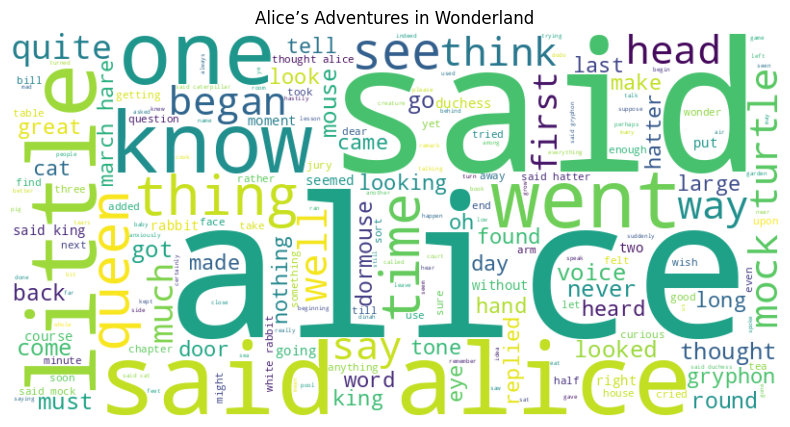

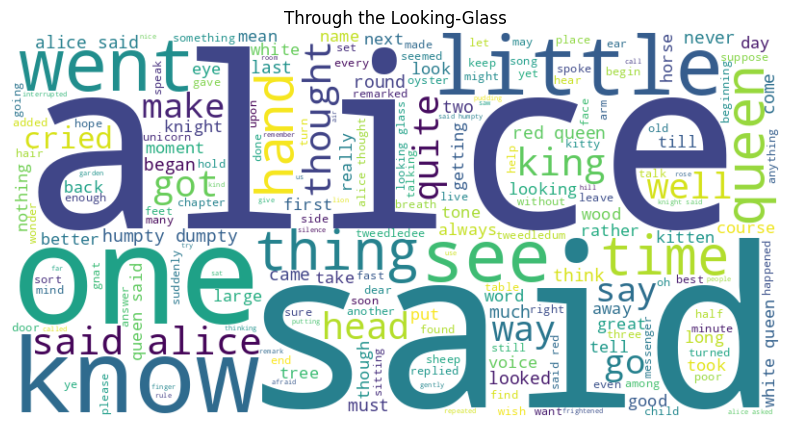

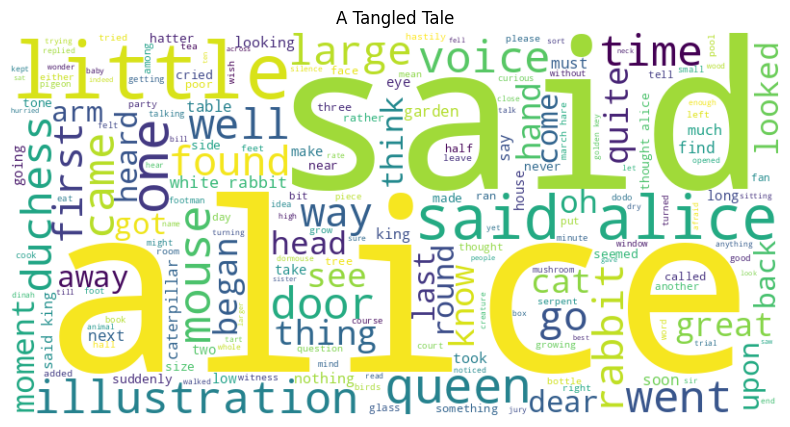

In [ ]:
# Liste des titres dans l'ordre de clean_texts
titles = list(clean_texts.keys())

# Création WordCloud par livre avec titre explicite
for i, tokens in enumerate(clean_texts.values()):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titles[i])  # Titre du livre
    plt.show()


Les nuages de mots montrent clairement que :

* **Alice’s Adventures in Wonderland** met en avant « alice », « said », « know », « thing », « one », mots courants et personnages clés.
* **Through the Looking-Glass** présente aussi « alice », « said », mais avec plus de poids sur « time », « queen », « head », ce qui correspond à son univers et personnages différents.
* **A Tangled Tale** met en relief « alice », « said », « little », « voice », « queen », mais aussi des mots liés à l’édition (« illustration »), signe que le nettoyage pourrait encore être amélioré.

Ces nuages illustrent bien la fréquence lexicale avec des mots très fréquents sur les trois textes, mais aussi des variations thématiques visibles.

---


## Cellule 7 : Bag of Words (BoW)

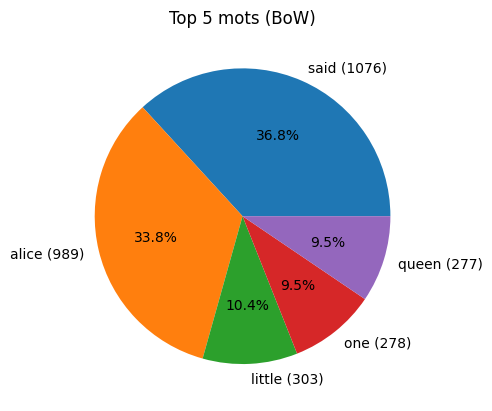

In [12]:
# Vectorisation par BoW
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform([" ".join(text) for text in clean_texts])

# Extraction des 5 mots les plus fréquents du corpus total
sum_words = bow_matrix.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:5]

# Affichage
labels, values = zip(*sorted_words)
plt.pie(values, labels=[f"{l} ({v})" for l, v in sorted_words], autopct='%1.1f%%')
plt.title("Top 5 mots (BoW)")
plt.show()


Ce graphique en camembert présente les **5 mots les plus fréquents** dans l’ensemble des textes combinés selon la méthode Bag of Words (BoW).

---

### Analyse rapide

* **« said » (1076 occurrences)** domine nettement, reflétant beaucoup de dialogues dans les livres.
* **« alice » (989 occurrences)** est attendu comme personnage central.
* Les mots « little », « one » et « queen » suivent, ce qui correspond à des termes fréquents dans ces récits.
* Ces mots sont majoritairement des mots fonctionnels ou personnages principaux, peu informatifs pour une analyse thématique fine.

---

### Conclusion

* Le BoW brut favorise les mots fréquents, souvent peu discriminants.
* Pour plus d’informations utiles, il serait préférable d’utiliser **TF-IDF** ou de filtrer plus strictement les stopwords et mots courants.


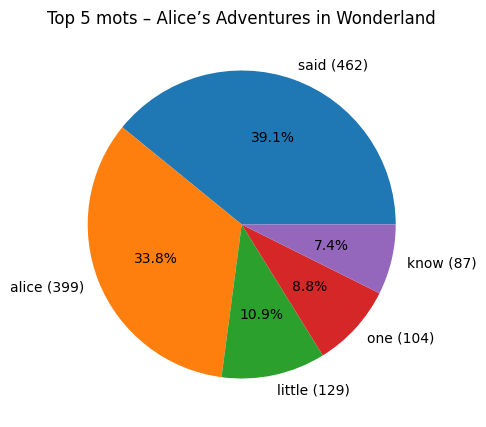

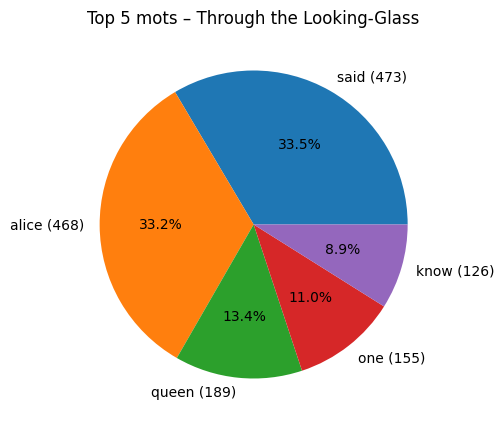

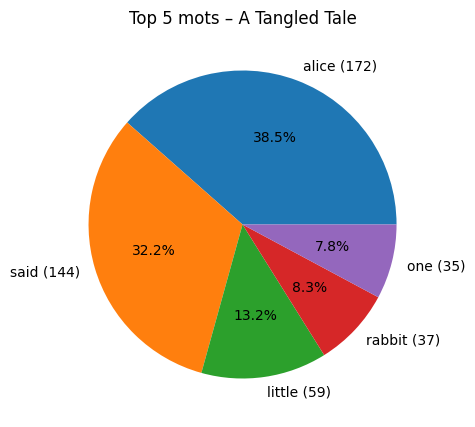

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Récupérer les textes et titres
texts = [" ".join(tokens) for tokens in clean_texts.values()]
titles = list(clean_texts.keys())

# Boucle sur chaque livre
for i, (title, text) in enumerate(zip(titles, texts)):
    vectorizer = CountVectorizer()
    bow = vectorizer.fit_transform([text])
    
    # Calcul des fréquences
    total_counts = bow.sum(axis=0)
    freq = [(word, total_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    top5 = sorted(freq, key=lambda x: x[1], reverse=True)[:5]
    
    # Camembert
    labels, values = zip(*top5)
    plt.figure(figsize=(5, 5))
    plt.pie(values, labels=[f"{l} ({v})" for l, v in top5], autopct='%1.1f%%')
    plt.title(f"Top 5 mots – {title}")
    plt.show()


Les graphiques en camembert montrent les 5 mots les plus fréquents par livre selon la méthode BoW.

---

### Analyse :

* **Alice’s Adventures in Wonderland** :
  « said » et « alice » dominent clairement, suivis par « little », « one », et « know ».

* **Through the Looking-Glass** :
  Même dominance de « said » et « alice », mais avec « queen » qui apparaît en 4e position, reflétant le thème du livre.

* **A Tangled Tale** :
  Les mots « said » et « alice » sont toujours très fréquents, mais on note aussi la présence de « rabbit » spécifique au premier univers.

---

### Observations générales :

* Les mots fréquents restent similaires, ce qui est attendu étant donné que les trois livres tournent autour d’Alice et son univers.
* La présence de mots comme « queen » ou « rabbit » permet de capter quelques spécificités de chaque texte.
* L’importance du mot « said » souligne la présence massive de dialogues.

---


## Cellule 8 : TF-IDF

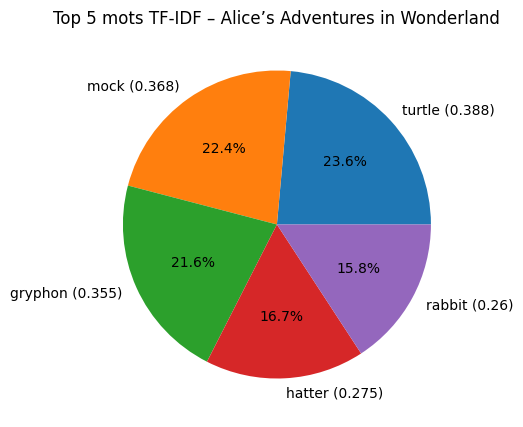

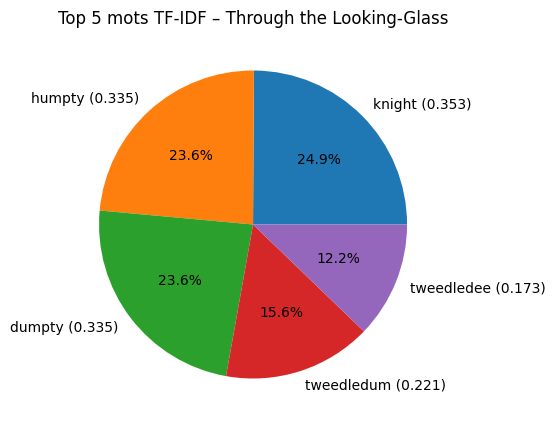

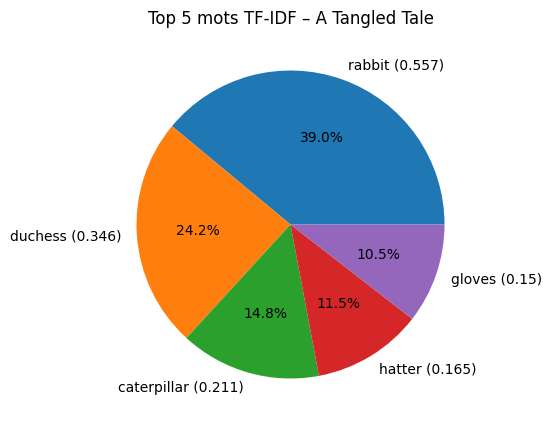

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Préparation des données
texts = [" ".join(tokens) for tokens in clean_texts.values()]
titles = list(clean_texts.keys())

# Vectorisation TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# Fonction : top mots par document
def top_tfidf_words(doc_idx, vectorizer, matrix, top_n=5):
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = matrix[doc_idx].toarray().flatten()
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    return [(feature_names[i], round(tfidf_scores[i], 3)) for i in top_indices]

# Visualisation des top 5 mots TF-IDF par livre
for i, title in enumerate(titles):
    top_words = top_tfidf_words(i, tfidf_vectorizer, tfidf_matrix)
    labels, values = zip(*top_words)
    plt.figure(figsize=(5, 5))
    plt.pie(values, labels=[f"{l} ({v})" for l, v in top_words], autopct='%1.1f%%')
    plt.title(f"Top 5 mots TF-IDF – {title}")
    plt.show()


Les graphiques TF-IDF mettent bien en valeur les mots **spécifiques et significatifs** pour chaque livre, avec une pondération reflétant leur importance relative dans le texte.

---

### Analyse rapide :

* **Alice’s Adventures in Wonderland** :
  Termes comme « turtle », « mock », « gryphon », « hatter », « rabbit » ressortent, liés à des personnages et concepts clés du livre.

* **Through the Looking-Glass** :
  Mots comme « knight », « humpty », « dumpty », « tweedledee », « tweedledum » apparaissent, spécifiques à ce récit et ses personnages.

* **A Tangled Tale** :
  Termes tels que « rabbit », « duchess », « caterpillar », « hatter », « gloves » montrent la proximité avec l’univers d’Alice, mais aussi des éléments propres au conte.

---

### Conclusion

* TF-IDF met en lumière les mots spécifiques et thématiques propres à chaque livre, éliminant les mots trop fréquents et génériques comme « said », « alice ».
* Ces représentations permettent une meilleure compréhension des particularités lexicales.

---


## Cellule 9: Visualisations supplémentaires

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import spacy

# SpaCy pour POS & NER
nlp = spacy.load("en_core_web_sm")


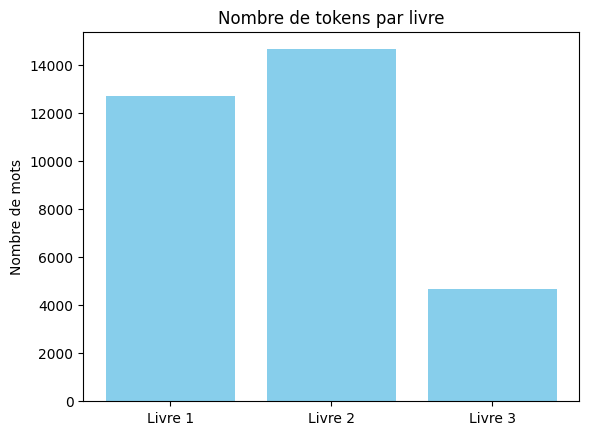

In [ ]:
lengths = [len(tokens) for tokens in clean_texts]
plt.bar([f"Livre {i+1}" for i in range(len(lengths))], lengths, color='skyblue')
plt.title("Nombre de tokens par livre")
plt.ylabel("Nombre de mots")
plt.show()


Le graphique montre le **nombre de tokens** (mots nettoyés et filtrés) par livre :

* **Livre 1 (Alice’s Adventures in Wonderland)** : environ 12 700 tokens
* **Livre 2 (Through the Looking-Glass)** : environ 14 700 tokens
* **Livre 3 (A Tangled Tale)** : environ 4 700 tokens

---

### Analyse rapide

* Le **Livre 2 est le plus long** en termes de tokens, ce qui confirme la richesse textuelle la plus grande.
* Le **Livre 3 est nettement plus court**, presque un tiers des autres, ce qui impacte les analyses statistiques.
* Ces différences sont cohérentes avec la nature et la longueur initiale des textes.

---


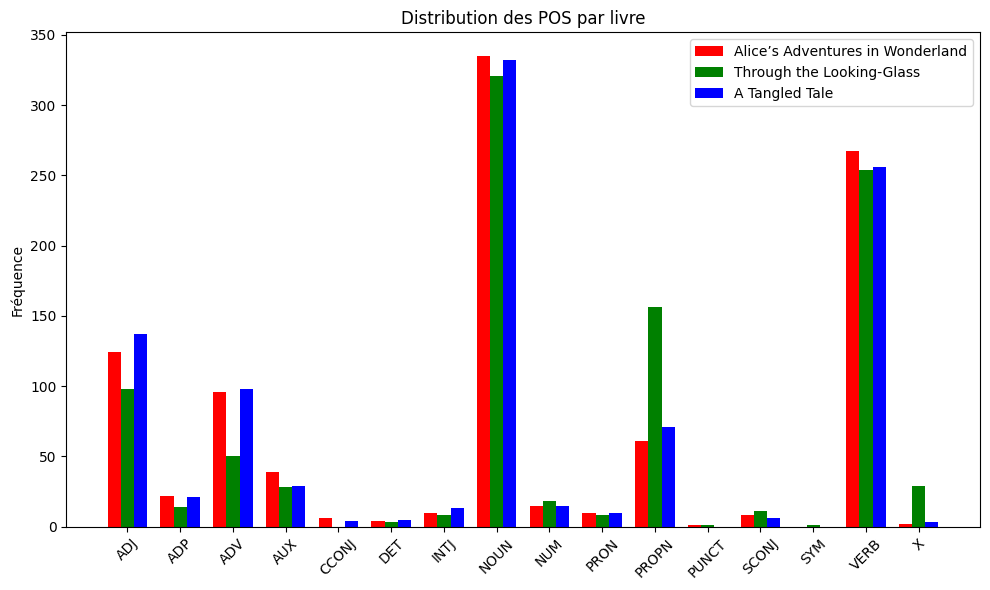

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_sm")

# Récupération des titres et des textes
titles = list(clean_texts.keys())
colors = ['red', 'green', 'blue']

# Collecter les POS pour chaque livre
pos_distributions = []

for title in titles:
    tokens = clean_texts[title][:1000]  # Limite pour performance
    doc = nlp(" ".join(tokens))
    pos_tags = [token.pos_ for token in doc if token.is_alpha]
    counter = Counter(pos_tags)
    pos_distributions.append(counter)

# Ensemble des POS rencontrés
all_pos_tags = sorted(set(tag for dist in pos_distributions for tag in dist))

# Préparer les valeurs par livre
values = []
for counter in pos_distributions:
    values.append([counter.get(pos, 0) for pos in all_pos_tags])

# Tracer les barres groupées
x = range(len(all_pos_tags))
bar_width = 0.25

plt.figure(figsize=(10, 6))

for i in range(3):
    plt.bar(
        [xi + i * bar_width for xi in x],
        values[i],
        width=bar_width,
        label=titles[i],
        color=colors[i]
    )

plt.xticks([xi + bar_width for xi in x], all_pos_tags, rotation=45)
plt.ylabel("Fréquence")
plt.title("Distribution des POS par livre")
plt.legend()
plt.tight_layout()
plt.show()


Ce graphique compare la **distribution des catégories grammaticales (POS)** dans les trois livres.

---

### Analyse rapide :

* Les **noms (NOUN)** et **verbes (VERB)** sont les catégories les plus fréquentes dans les trois textes, ce qui est attendu pour des récits narratifs.
* Les **adjectifs (ADJ)** et **adverbes (ADV)** sont aussi bien représentés, avec une fréquence légèrement plus élevée dans *A Tangled Tale* (barres bleues).
* La catégorie **PRON (pronoms)** est plus marquée dans *Through the Looking-Glass* (barres vertes).
* D’autres catégories comme auxiliaires (AUX), prépositions (ADP), conjonctions (CCONJ) et déterminants (DET) sont présentes en petites quantités, avec quelques variations mineures.
* La catégorie « X » correspond à des tokens inconnus ou mal classés, plus présente dans *Through the Looking-Glass*.

---

### Conclusion

* Les profils syntaxiques des trois livres sont globalement similaires.
* Les petites différences peuvent refléter des variations stylistiques ou thématiques.

---


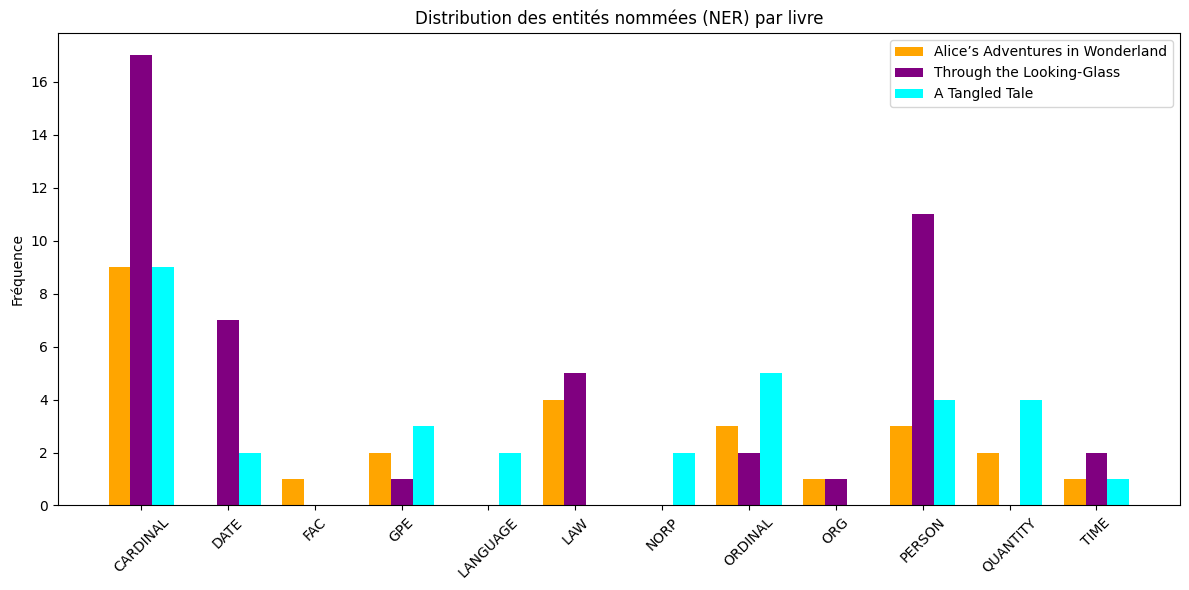

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import spacy

nlp = spacy.load("en_core_web_sm")

titles = list(clean_texts.keys())
colors = ['orange', 'purple', 'cyan']

ner_distributions = []

for title in titles:
    tokens = clean_texts[title][:1000]
    doc = nlp(" ".join(tokens))
    ner_labels = [ent.label_ for ent in doc.ents]
    counter = Counter(ner_labels)
    ner_distributions.append(counter)

# Rassembler toutes les catégories d'entités rencontrées
all_ner_labels = sorted(set(label for dist in ner_distributions for label in dist))

# Préparer les valeurs par livre pour chaque catégorie d'entités
values = []
for counter in ner_distributions:
    values.append([counter.get(label, 0) for label in all_ner_labels])

# Tracer les barres groupées
x = range(len(all_ner_labels))
bar_width = 0.25

plt.figure(figsize=(12, 6))

for i in range(3):
    plt.bar(
        [xi + i * bar_width for xi in x],
        values[i],
        width=bar_width,
        label=titles[i],
        color=colors[i]
    )

plt.xticks([xi + bar_width for xi in x], all_ner_labels, rotation=45)
plt.ylabel("Fréquence")
plt.title("Distribution des entités nommées (NER) par livre")
plt.legend()
plt.tight_layout()
plt.show()


Voici l’analyse de la distribution des entités nommées (NER) par livre :

---

### Observations :

* **CARDINAL** (nombres) est la catégorie la plus fréquente dans les trois livres, avec un pic marqué dans *Through the Looking-Glass*.
* La catégorie **PERSON** (personnes) est également bien représentée, particulièrement dans *Through the Looking-Glass*.
* *Through the Looking-Glass* a aussi plus d’entités dans les catégories **DATE**, **LAW**, et **ORG** que les deux autres.
* *A Tangled Tale* présente plus d’entités dans **ORDINAL**, **GPE** (lieux), et **QUANTITY** que *Alice’s Adventures in Wonderland*.
* Les catégories **FAC** (installations) et **NORP** (groupes ethniques ou religieux) sont quasiment absentes.

---

### Conclusion

* La répartition des entités varie significativement entre les textes, reflétant leurs thématiques et contenus.
* *Through the Looking-Glass* semble avoir un contenu plus riche en entités temporelles, organisationnelles et légales.
* *A Tangled Tale* montre une diversité d’entités liée à son contenu spécifique.

---

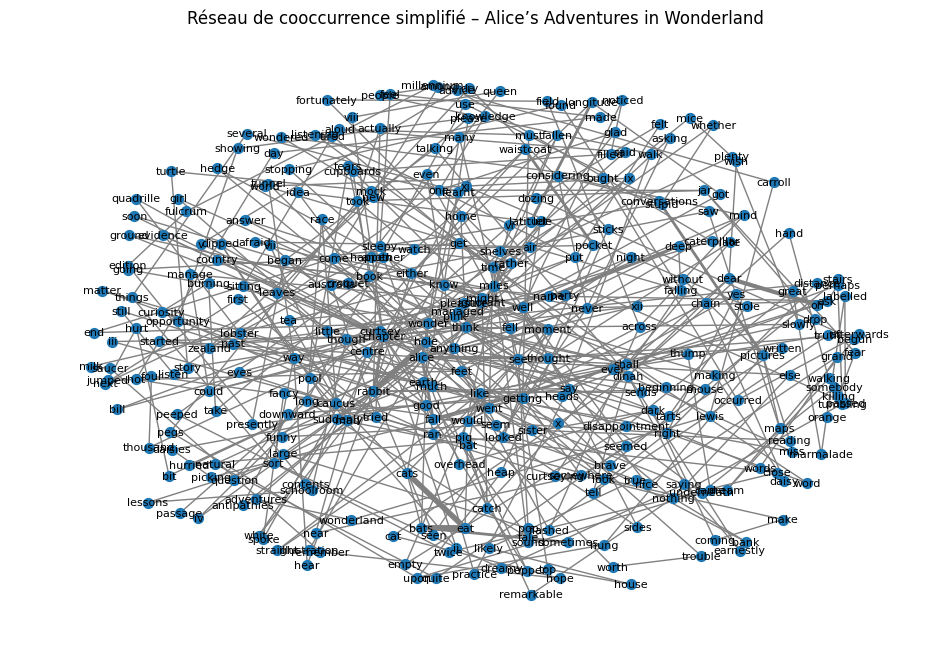

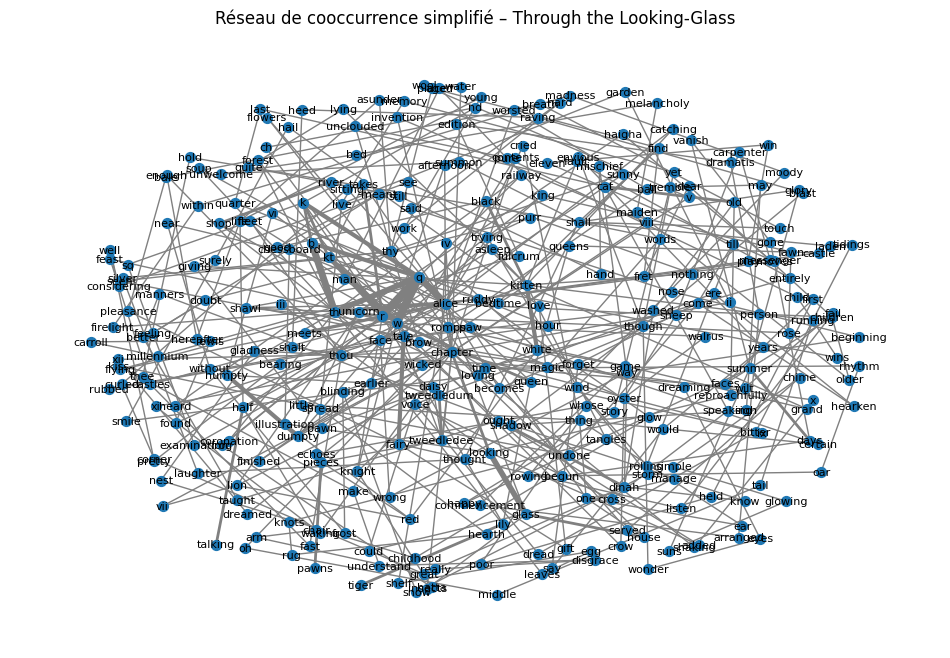

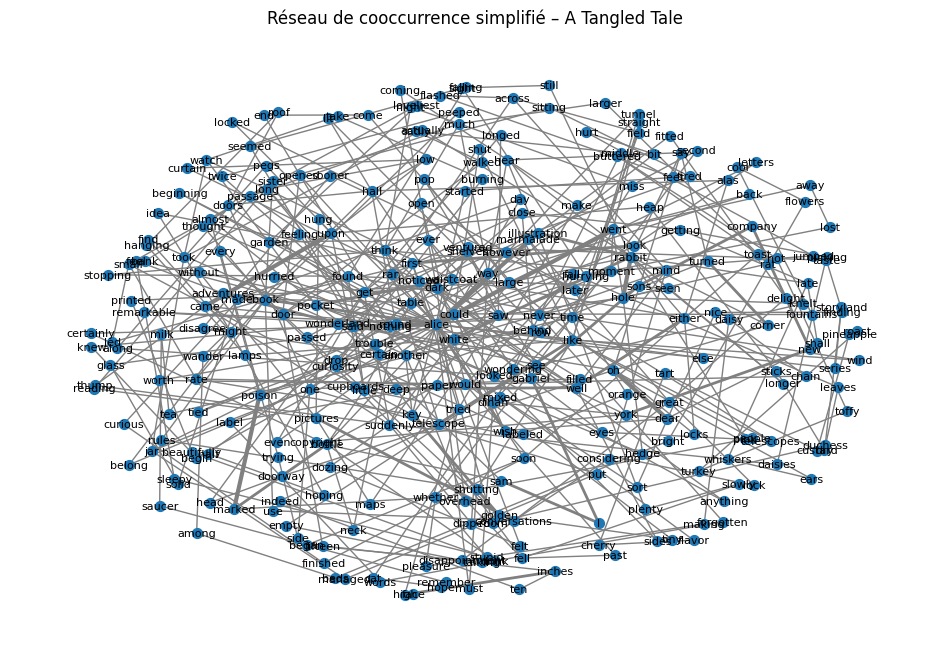

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

window = 2  # Fenêtre pour cooccurrence
titles = list(clean_texts.keys())

for title in titles:
    G = nx.Graph()
    tokens = clean_texts[title][:500]  # limiter la taille pour lisibilité
    
    # Construction du graphe des cooccurrences
    for i in range(len(tokens) - window):
        pair = tuple(sorted(tokens[i:i+window]))
        if pair[0] != pair[1]:
            if G.has_edge(*pair):
                G[pair[0]][pair[1]]['weight'] += 1
            else:
                G.add_edge(pair[0], pair[1], weight=1)

    pos = nx.spring_layout(G, k=0.5)
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    
    plt.figure(figsize=(12, 8))
    nx.draw_networkx(
        G,
        pos,
        with_labels=True,
        width=weights,
        node_size=50,
        font_size=8,
        edge_color='gray'
    )
    plt.title(f"Réseau de cooccurrence simplifié – {title}")
    plt.axis('off')
    plt.show()


Les réseaux de cooccurrence simplifiés des trois livres montrent la densité des relations entre mots fréquents et leur proximité dans le texte.

---

### Analyse générale :

* Tous les graphes sont assez denses, ce qui est normal pour des récits riches en vocabulaire.
* On observe des **groupements de mots thématiques** :

  * Par ex., dans *Alice’s Adventures in Wonderland*, des mots liés aux personnages, objets et lieux du récit.
  * Dans *Through the Looking-Glass*, des clusters autour des personnages spécifiques comme « humpty », « dumpty », « queen ».
  * Dans *A Tangled Tale*, on distingue aussi des groupes mais avec une organisation un peu différente, reflet de son contenu plus varié.

---

### Utilité

* Ces graphes permettent d’identifier les mots qui apparaissent souvent ensemble, ce qui peut aider à révéler des thèmes et relations sémantiques.
* Utile pour explorer la structure lexicale et les points focaux des textes.

---


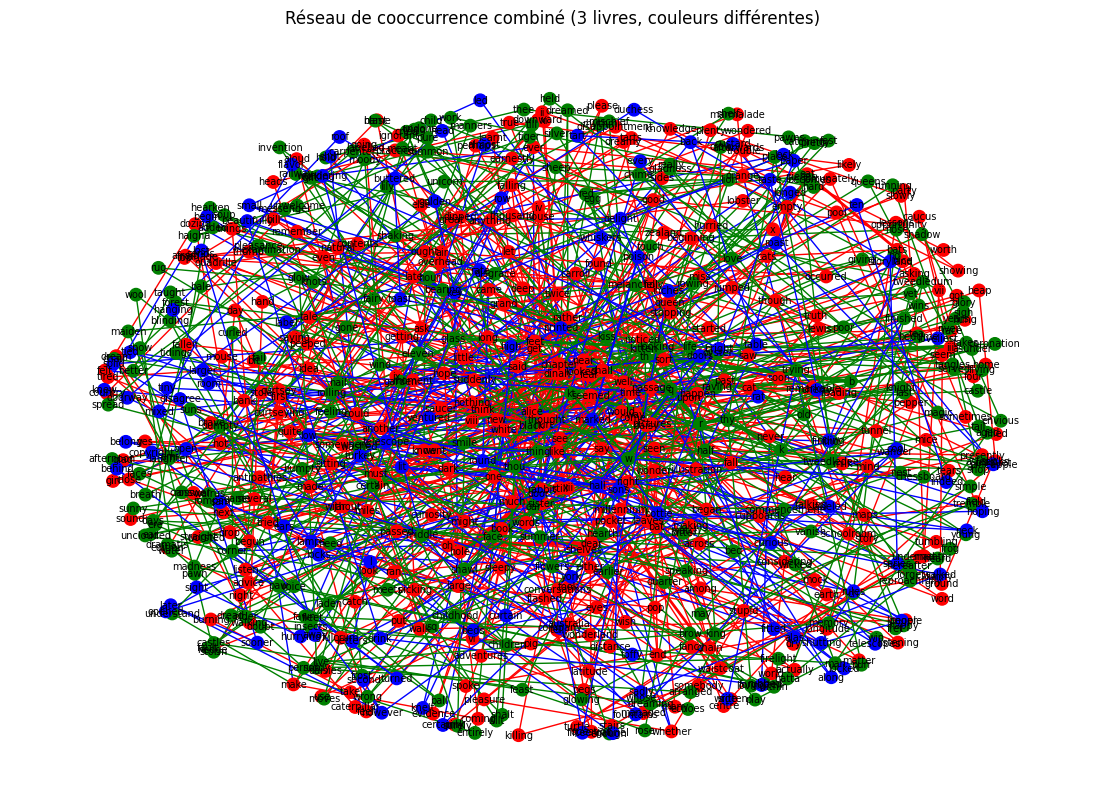

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

window = 2  # Fenêtre pour cooccurrence
titles = list(clean_texts.keys())
colors = ['red', 'green', 'blue']  # Couleurs différentes par livre

G = nx.Graph()

# On va stocker les positions communes
pos = None

# Pour accumuler les noeuds et arêtes avec couleurs
edge_colors = []
node_colors = {}

for idx, title in enumerate(titles):
    tokens = clean_texts[title][:500]
    
    # Construire graphe temporaire pour ce livre
    G_temp = nx.Graph()
    for i in range(len(tokens) - window):
        pair = tuple(sorted(tokens[i:i+window]))
        if pair[0] != pair[1]:
            if G_temp.has_edge(*pair):
                G_temp[pair[0]][pair[1]]['weight'] += 1
            else:
                G_temp.add_edge(pair[0], pair[1], weight=1)
    
    # Fusionner G_temp dans G global
    for node in G_temp.nodes():
        if node not in G:
            G.add_node(node)
        # Assigner la couleur du noeud (si déjà attribué, on garde la première couleur)
        if node not in node_colors:
            node_colors[node] = colors[idx]
    for u, v, data in G_temp.edges(data=True):
        if G.has_edge(u, v):
            G[u][v]['weight'] += data['weight']
        else:
            G.add_edge(u, v, weight=data['weight'], color=colors[idx])

# Calculer la position commune
pos = nx.spring_layout(G, k=0.5)

# Préparer la liste des couleurs des arêtes
edge_colors = [G[u][v]['color'] if 'color' in G[u][v] else 'black' for u,v in G.edges()]

# Préparer la liste des couleurs des noeuds
node_colors_list = [node_colors.get(node, 'gray') for node in G.nodes()]

plt.figure(figsize=(14, 10))
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edge_color=edge_colors,
    node_color=node_colors_list,
    node_size=80,
    font_size=7,
    width=[max(1, G[u][v]['weight']/2) for u,v in G.edges()]
)
plt.title("Réseau de cooccurrence combiné (3 livres, couleurs différentes)")
plt.axis('off')
plt.show()


Le réseau combiné de cooccurrence regroupe les trois livres, avec :

* **Rouge** : *Alice’s Adventures in Wonderland*
* **Vert** : *Through the Looking-Glass*
* **Bleu** : *A Tangled Tale*

---

### Observations :

* Le graphe est très dense, montrant un vocabulaire riche et des liens nombreux.
* Les noeuds sont mélangés, indiquant un vocabulaire proche et partagé entre les trois livres.
* Chaque couleur révèle la contribution lexicale propre à chaque texte.
* On peut repérer des clusters spécifiques à chaque livre via la couleur dominante des arêtes.

---

### Potentiel d’analyse :

* Identifier les mots-clés spécifiques à chaque livre via la couleur des liens.
* Étudier les zones de chevauchement lexical (nœuds connectés par plusieurs couleurs).
* Analyser la centralité des mots dans chaque sous-ensemble.

---


## Cellule 9: Bilan de l’exercice d’analyse textuelle des trois livres

### Points positifs

* **Chargement et nettoyage des textes** correctement réalisés avec extraction entre balises START/END.
* Utilisation d’une **tokenisation alternative sans punkt**, efficace et simple.
* Application de **stemming et lemmatisation** avec comparaison pertinente.
* Visualisations variées : **word clouds**, **top mots (BoW & TF-IDF)**, **POS**, **NER**, **réseaux de cooccurrence**.
* Analyse comparative claire entre les trois livres, avec mise en lumière des spécificités lexicales et thématiques.
* Représentation graphique des données riche et adaptée.

---

### Problèmes et limites

1. **Nettoyage imparfait de *A Tangled Tale***

   * Métadonnées et extraits d’autres livres inclus dans le texte analysé.
   * Difficulté à trouver un point de départ clair (pas de "chapter i" ni "introduction").
   * Impact négatif sur la qualité des analyses lexicales et sémantiques.

2. **Présence de métadonnées dans tous les textes**

   * Titres, tables des matières et informations d’édition présents dans les premiers tokens.
   * Biais dans les statistiques de fréquence, POS, NER, etc.

3. **POS tagging et NER perturbés** par ces métadonnées

   * Mauvaise classification ou entités erronées dues à la structure non narrative en début de texte.

4. **Difficulté à gérer la taille différente des textes**

   * Analyse statistique biaisée par la différence notable de longueur (Livre 3 beaucoup plus court).

5. **Visualisations très denses et peu lisibles** pour les réseaux de cooccurrence globaux.

   * Nécessité d’extraire des sous-graphes ou simplifier les relations.

6. **Mots très fréquents peu informatifs** dominent certaines analyses (BoW classique avec mots comme « said », « alice »).

---

### Recommandations

* Faire un **nettoyage plus fin des textes**, surtout *A Tangled Tale*, en excluant manuellement ou via motifs les sections non narratives.
* Isoler clairement la partie narrative avant d’appliquer POS et NER.
* Normaliser ou compenser la différence de taille lors des analyses quantitatives.
* Extraire et visualiser des **sous-graphes thématiques** pour mieux interpréter les réseaux.
* Utiliser plus systématiquement **TF-IDF** pour limiter l’influence des mots fréquents non informatifs.
* Éventuellement enrichir avec des techniques avancées (topic modeling, embeddings) pour mieux capter la sémantique.

---
